In [7]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from scipy.stats import gaussian_kde

arr = np.random.randint(20, size=(4,7))

print(arr, '\n')
print(arr[::2, ::3])

[[ 4 14  2  4 18  2 18]
 [11  6 19 17 14  8  3]
 [10  7 10  3  5 15  9]
 [14 17 19  1 12 13 13]] 

[[ 4  4 18]
 [10  3  9]]


In [2]:
cube_to_dict = lambda cube: {(x, y): cube[x,y] for x in range(cube.shape[0]) for y in range(cube.shape[1])}

pprint(cube_to_dict(np.random.randint(27, size=(3,3,6))))

{(0, 0): array([25, 23,  3, 16,  2, 21]),
 (0, 1): array([22,  9, 14,  2, 14,  3]),
 (0, 2): array([22,  1,  8, 25, 11,  9]),
 (1, 0): array([17,  3, 19, 10, 13,  7]),
 (1, 1): array([25, 25,  2,  1,  1,  2]),
 (1, 2): array([24,  8, 10, 10,  3, 22]),
 (2, 0): array([16, 21,  8, 25, 23,  1]),
 (2, 1): array([26,  4, 19,  9, 14, 16]),
 (2, 2): array([ 5,  9, 26,  3,  6, 19])}


In [3]:
from itertools import product

cube_to_dict = lambda cube: {tup: cube[tup] for tup in product(range(cube.shape[0]), range(cube.shape[1]))}

pprint(cube_to_dict(np.random.randint(27, size=(3,3,6))))

{(0, 0): array([19, 24, 20, 20, 24, 11]),
 (0, 1): array([23,  9, 14, 26,  0, 20]),
 (0, 2): array([ 7, 13, 24,  1, 15, 13]),
 (1, 0): array([ 2, 11, 24, 10, 17, 19]),
 (1, 1): array([14, 26, 15, 22,  0, 13]),
 (1, 2): array([10, 23, 12, 19, 23,  5]),
 (2, 0): array([13, 13, 20,  1, 15, 16]),
 (2, 1): array([ 1,  6,  9, 18,  0, 25]),
 (2, 2): array([21, 25,  9,  0, 20, 23])}


In [4]:
dtype = np.dtype([('hour', 'i4'), ('min', 'i4'), ('sec', 'i4'), ('temperature', 'f8')])


arr = np.array([(23, 35, 21, 23.4),
                (15, 32, 57, 16.3),
                (11, 48, 23, 25.7)], dtype=dtype)


to_pretty_string = lambda arr: np.array([f'{elem["hour"]}:{elem["min"]}:{elem["sec"]} - {elem["temperature"]:.1f}°' for elem in arr]).T

print(to_pretty_string(arr))

['23:35:21 - 23.4°' '15:32:57 - 16.3°' '11:48:23 - 25.7°']


In [5]:
dist_to_barcelona = np.array([0, 34, 123, 235, 463, 645, 998])

distances = abs(dist_to_barcelona[:, np.newaxis] - dist_to_barcelona[np.newaxis, :])

print(distances)

[[  0  34 123 235 463 645 998]
 [ 34   0  89 201 429 611 964]
 [123  89   0 112 340 522 875]
 [235 201 112   0 228 410 763]
 [463 429 340 228   0 182 535]
 [645 611 522 410 182   0 353]
 [998 964 875 763 535 353   0]]


In [6]:
arr = np.array([3,4,6,10,24,89,45,43,46,99,100])

arr[arr % 3]

array([3, 4, 3, 4, 3, 6, 3, 4, 4, 3, 4])

Split: 79.7% Train, 20.3% Test


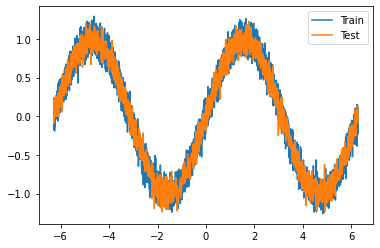

In [7]:
scale = 0.1
num_points = 10000

x = np.linspace(-2*np.pi, 2*np.pi, num_points)
y = np.sin(x) + np.random.normal(scale=scale, size=num_points)

msk = np.random.rand(num_points) < 0.8
x_train, y_train = x[msk], y[msk]
x_test, y_test = x[~msk], y[~msk]

print(f'Split: {x_train.shape[0] / num_points * 100:.1f}% Train, {x_test.shape[0] / num_points * 100:.1f}% Test')

plt.plot(x_train, y_train, label='Train') 
plt.plot(x_test, y_test, label='Test')
plt.legend()
plt.show()

In [8]:
plt.figure(1)
colombia = mpimg.imread('Downloads\colombia.png')
plt.imshow(colombia)
new_colombia = np.copy(colombia)


num_trials = 10
len_x = new_colombia.shape[0]
len_y = new_colombia.shape[1]
history = []

for i in range(num_trials):

    print(f'{i+1}. Trial')
    t = time.time()
    for x in range(len_x):
        for y in range(len_y):
            new_colombia[x, y, 0] = max(1-(x / (len_x/2)-1)**2 - (y / (len_y/2)-1)**2, 0)
    t1 = time.time() - t

    t = time.time()
    mesh_y, mesh_x = np.meshgrid(np.arange(len_y), np.arange(len_x))
    new_colombia[:, :, 0] = np.maximum(1-(mesh_x / (len_x/2)-1)**2 - (mesh_y / (len_y/2)-1)**2, 0)
    t2 = time.time() - t
    
    history.append([t1, t2])

history = np.array(history)
print('\nAverages:')
print(f' for-loop: {np.mean(history[:, 0]):.3f}')
print(f' vectorized: {np.mean(history[:, 1]):.3f}')
print(f' factor: {np.mean(history[:, 0] / history[:, 1]):.3f}')

plt.figure(2)
plt.imshow(new_colombia)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads\\colombia.png'

<Figure size 432x288 with 0 Axes>

In [9]:
cities = {'Cologne': 1056000, 'Berlin': 3451000, 'Hamburg': 1841000}

s = pd.Series(cities.values(), cities.keys())

def exp_growth(count, p, m):
    return int(count * (1 + p/100)**m)

print(s)

s = s.apply(exp_growth, args=(3,10))

print()
print(s)


Cologne    1056000
Berlin     3451000
Hamburg    1841000
dtype: int64

Cologne    1419175
Berlin     4637855
Hamburg    2474150
dtype: int64


<AxesSubplot:>

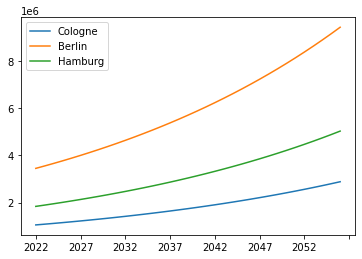

In [10]:
cities = {'Cologne': 1056000, 'Berlin': 3451000, 'Hamburg': 1841000}

s = pd.Series(cities.values(), cities.keys())

def exp_growth_gen(s, start=2022, end=2027, p=3):
    end = int(max(start+1, end))
    year = start
    while year <= end:
        s.name = str(year)
        yield s      
        s = s.apply(lambda count: int(count * (1 + p/100)))
        year += 1

gen = exp_growth_gen(s, end=2056)
df = pd.concat(list(gen), axis=1)
df.T.plot()

In [11]:
cities = {'Cologne': [1056000, 'Germany'], 
          'London': [3451000, 'England'], 
          'Paris': [1841000, 'France'],
          'Helsinki': [631000, 'Finland'],
          'New York City': [8380000, 'USA']}

df = pd.DataFrame.from_dict(cities, orient='index', columns=['Population', 'Country'])

df.insert(2, 'Area', [1235, 1365, 8657, 2135, 1923])
df.sort_values(by='Area', ascending=True)

,Population,Country,Area
Cologne,1056000,Germany,1235
London,3451000,England,1365
New York City,8380000,USA,1923
Helsinki,631000,Finland,2135
Paris,1841000,France,8657


In [24]:
def kde_plot(data, covariance_factor=.25):
    mean_num_fires = np.mean(data)
    std_num_fires = np.std(data)

    density = gaussian_kde(data)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    
    fig = plt.figure()
    ax = plt.gca()    
    x = np.linspace(0,max(data) * 1.1,1000)
    ax.plot(x, density(x))
    ax.axvline(x=mean_num_fires, color='k')
    ax.axvspan(0, mean_num_fires - 0.5 * std_num_fires, alpha=0.3, color='green')
    ax.axvspan(mean_num_fires - 0.5 * std_num_fires, mean_num_fires + 0.5 * std_num_fires, alpha=0.3, color='yellow')
    ax.axvspan(mean_num_fires + 0.5 * std_num_fires, max(data), alpha=0.3, color='red')

In [25]:
# load excel file
df = pd.read_excel(r'C:\Users\jastr\Desktop\Waldbraende.xlsx', usecols=[1,2,3,4,5], skiprows=1)
df.columns = ['year', 'state', 'month', 'num_fires', 'report_date']

# calculate, for each state-month combination, the propability of at least one fire happening
prob_dict = {key: (group['num_fires'] > 0).sum() / group.shape[0] for key, group in df.groupby(['state', 'month'])}

# some stats
prob_data = list(prob_dict.values()) 
mean_num_fires = np.mean(prob_data)
std_num_fires = np.std(prob_data)

# risk calculation via z-score
def risk(state, month):
    z_score = (prob_dict[(state, month)] - mean_num_fires) / std_num_fires
    if z_score < -0.5:
        return 'green'
    elif z_score < 0.5:
        return 'yellow'
    else:
        return 'red'
    
[print(f'{key}: {risk(*key)} [{value}]') for key, value in prob_dict.items()]; # suppresses output

('Acre', 'Abril'): green [0.55]
('Acre', 'Agosto'): red [1.0]
('Acre', 'Dezembro'): yellow [0.631578947368421]
('Acre', 'Fevereiro'): green [0.35]
('Acre', 'Janeiro'): green [0.3]
('Acre', 'Julho'): red [1.0]
('Acre', 'Junho'): yellow [0.75]
('Acre', 'Maio'): yellow [0.75]
('Acre', 'Março'): green [0.4]
('Acre', 'Novembro'): red [0.85]
('Acre', 'Outubro'): red [1.0]
('Acre', 'Setembro'): red [1.0]
('Alagoas', 'Abril'): red [0.9]
('Alagoas', 'Agosto'): yellow [0.8235294117647058]
('Alagoas', 'Fevereiro'): red [0.95]
('Alagoas', 'Janeiro'): red [0.9523809523809523]
('Alagoas', 'Julho'): green [0.2]
('Alagoas', 'Junho'): green [0.4]
('Alagoas', 'Maio'): yellow [0.6]
('Alagoas', 'Março'): red [0.9]


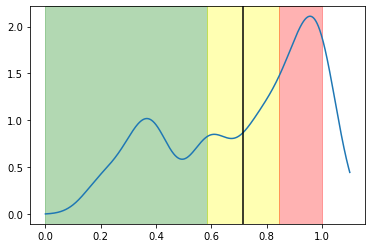

In [26]:
kde_plot(prob_data)
plt.show()

In [27]:
# load excel file
df = pd.read_excel(r'C:\Users\jastr\Desktop\Waldbraende.xlsx', usecols=[1,2,3,4,5], skiprows=1)
df.columns = ['year', 'state', 'month', 'num_fires', 'report_date']

# count, for each state-month combination, # of fires / # of rows
occurence_dict = {key: group['num_fires'].sum() / group.shape[0] for key, group in df.groupby(['state', 'month'])}

# some stats
occurence_data = list(occurence_dict.values()) 
mean_num_fires = np.mean(occurence_data)
std_num_fires = np.std(occurence_data)

# risk calculation via z-score
def risk(state, month):
    z_score = (occurence_dict[(state, month)] - mean_num_fires) / std_num_fires
    if z_score < -0.5:
        return 'green'
    elif z_score < 0.5:
        return 'yellow'
    else:
        return 'red'
    
[print(f'{key}: {risk(*key)} [{value}]') for key, value in occurence_dict.items()]; # suppresses output

('Acre', 'Abril'): yellow [2.05]
('Acre', 'Agosto'): red [3138.95]
('Acre', 'Dezembro'): yellow [2.473684210526316]
('Acre', 'Fevereiro'): yellow [0.95]
('Acre', 'Janeiro'): yellow [2.0]
('Acre', 'Julho'): yellow [114.8]
('Acre', 'Junho'): yellow [12.85]
('Acre', 'Maio'): yellow [4.05]
('Acre', 'Março'): yellow [1.15]
('Acre', 'Novembro'): yellow [35.4]
('Acre', 'Outubro'): yellow [437.65]
('Acre', 'Setembro'): red [4676.85]
('Alagoas', 'Abril'): yellow [12.25]
('Alagoas', 'Agosto'): yellow [1.8235294117647058]
('Alagoas', 'Fevereiro'): yellow [25.15]
('Alagoas', 'Janeiro'): yellow [44.42857142857143]
('Alagoas', 'Julho'): yellow [0.55]
('Alagoas', 'Junho'): yellow [1.0]
('Alagoas', 'Maio'): yellow [2.8]
('Alagoas', 'Março'): yellow [27.7]


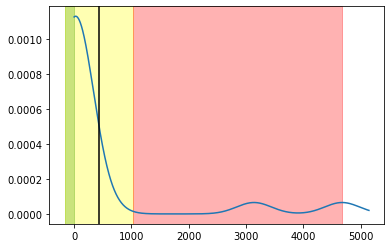

In [28]:
kde_plot(occurence_data)
plt.show()